In [1]:
import os
from typing import Tuple, List
import torch 
from torch import nn, optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from common import DATA_DIR, TRAIN_DIR, TEST_DIR, IMG_SIZE, CLASS_NAMES, DEVICE, NUM_CLASSES, OUTPUT_MODELS_DIR, OUTPUT_PLOTS_DIR
from model.tumor_efficientnet import build_model, build_optimizer
from train.cnn_train import train_model
from data_loader import create_data_loaders

# constants
IMG_SIZE: Tuple[int, int] = (256, 256)
BATCH_SIZE: int = 32
VALID_SPLIT: float = 0.2
EPOCHS: int = 20
os.makedirs(OUTPUT_MODELS_DIR, exist_ok=True)

In [2]:
model = build_model(NUM_CLASSES, IMG_SIZE, DEVICE)
optimizer = build_optimizer(model)

In [3]:
train_loader, val_loader, test_loader = create_data_loaders(img_size=IMG_SIZE, batch_size=BATCH_SIZE, valid_split=VALID_SPLIT)

In [4]:
history = train_model(model, train_loader, val_loader, optimizer=optimizer, epochs=EPOCHS)

Epoch 1/20 - Train Loss: 0.3664, Train Acc: 0.8764 - Val Loss: 0.2821, Val Acc: 0.9177
Epoch 2/20 - Train Loss: 0.1763, Train Acc: 0.9420 - Val Loss: 0.1217, Val Acc: 0.9588
Epoch 3/20 - Train Loss: 0.1123, Train Acc: 0.9615 - Val Loss: 0.1132, Val Acc: 0.9667
Epoch 4/20 - Train Loss: 0.1069, Train Acc: 0.9707 - Val Loss: 0.0921, Val Acc: 0.9755
Epoch 5/20 - Train Loss: 0.0644, Train Acc: 0.9790 - Val Loss: 0.1139, Val Acc: 0.9746
Epoch 6/20 - Train Loss: 0.0739, Train Acc: 0.9818 - Val Loss: 0.1129, Val Acc: 0.9641
Epoch 7/20 - Train Loss: 0.0684, Train Acc: 0.9779 - Val Loss: 0.0584, Val Acc: 0.9807
Epoch 8/20 - Train Loss: 0.0539, Train Acc: 0.9836 - Val Loss: 0.0879, Val Acc: 0.9790
Epoch 9/20 - Train Loss: 0.0326, Train Acc: 0.9910 - Val Loss: 0.0557, Val Acc: 0.9877
Epoch 10/20 - Train Loss: 0.0400, Train Acc: 0.9862 - Val Loss: 0.0611, Val Acc: 0.9816
Epoch 11/20 - Train Loss: 0.0398, Train Acc: 0.9869 - Val Loss: 0.0602, Val Acc: 0.9851
Epoch 12/20 - Train Loss: 0.0388, Train A

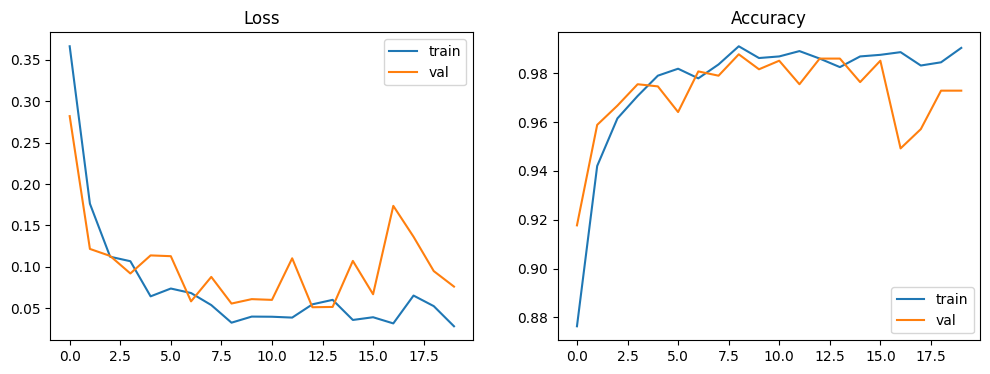

Test Loss: 0.1164
Test Accuracy: 0.9664


In [5]:
from train.cnn_train import validate


def plot_history(history: dict[str, List[float]]) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    axes[0].plot(history["train_loss"], label="train")
    axes[0].plot(history["val_loss"], label="val")
    axes[0].set_title("Loss"); axes[0].legend()
    axes[1].plot(history["train_acc"], label="train")
    axes[1].plot(history["val_acc"], label="val")
    axes[1].set_title("Accuracy"); axes[1].legend()
    plt.show()

def test_evaluate(model: nn.Module,
                  loader: DataLoader
                  ) -> None:
    loss, acc = validate(model, loader, nn.CrossEntropyLoss())
    print(f"Test Loss: {loss:.4f}\nTest Accuracy: {acc:.4f}")

plot_history(history)
test_evaluate(model, test_loader)

In [6]:
# usage
from train.save import save_experiment

default_remark = f"Image size: {IMG_SIZE}, Batch size: {BATCH_SIZE}, EPOCHS: {EPOCHS}"

save_experiment(
    model,
    history,
    OUTPUT_MODELS_DIR,
    save_full_model=True,
    export_torchscript=False,
    remark=f"Test EfficientNet CNN, {default_remark}"
)

Saving to: output\models\brain_tumor_mri_CNN_0002
